In [36]:
import sys
!{sys.executable} -m pip install xgboost

In [37]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [38]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the datasets
train = pd.read_csv('~/documents/jupyter/Houses/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('~/documents/jupyter/Houses/house-prices-advanced-regression-techniques/test.csv')

In [41]:
# Display dataset information
print("Training set shape:", train.shape)
print("Test set shape:", test.shape)
print("\nTraining set columns:")
print(train.columns.tolist())

Training set shape: (1460, 81)
Test set shape: (1459, 80)

Training set columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',

In [42]:
# Display first few rows of training data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
# Basic statistics for numerical features
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


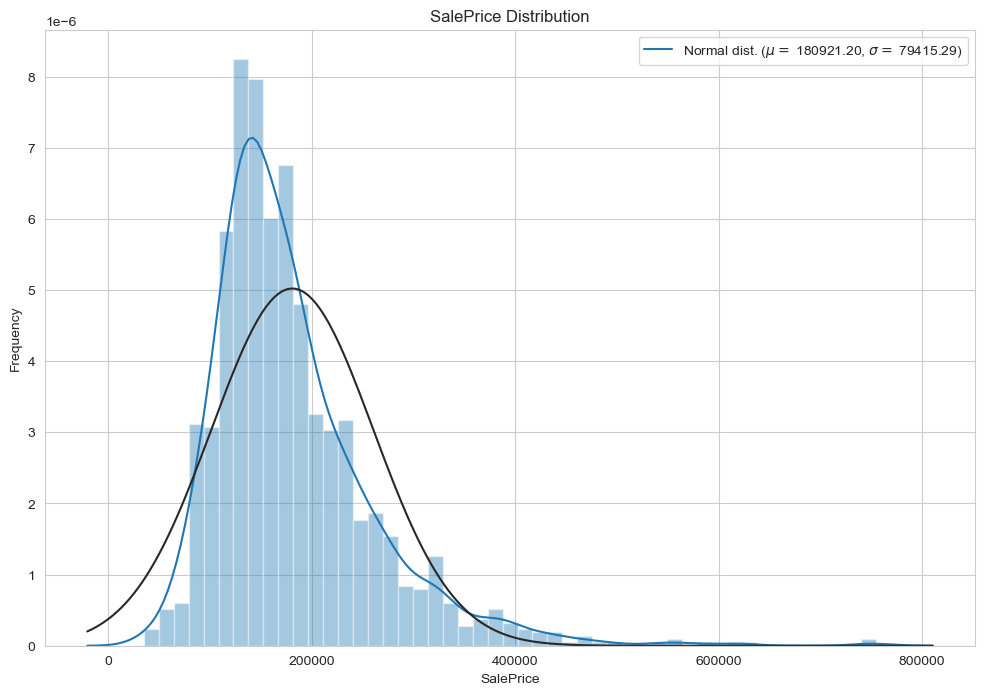

In [44]:
# Analyze the target variable (SalePrice)
sns.distplot(train['SalePrice'], fit=norm)
plt.title('SalePrice Distribution')
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Check skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


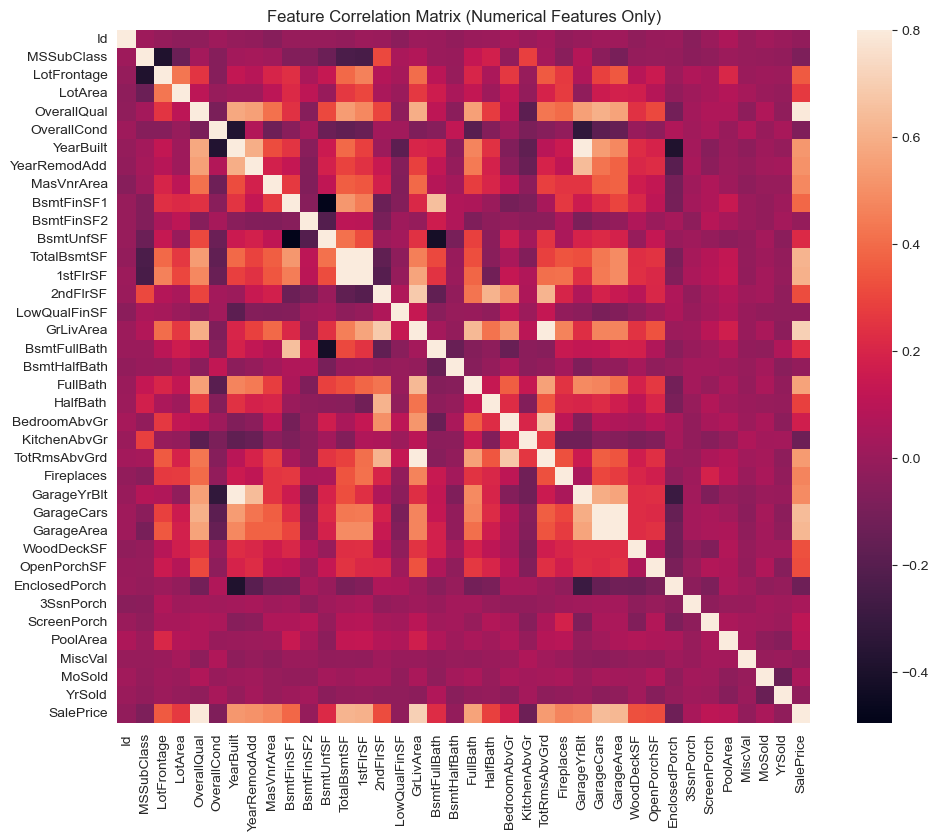

In [46]:
# Correlation matrix - only use numerical columns
numerical_cols = train.select_dtypes(include=[np.number]).columns
corrmat = train[numerical_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.title('Feature Correlation Matrix (Numerical Features Only)')
plt.show()

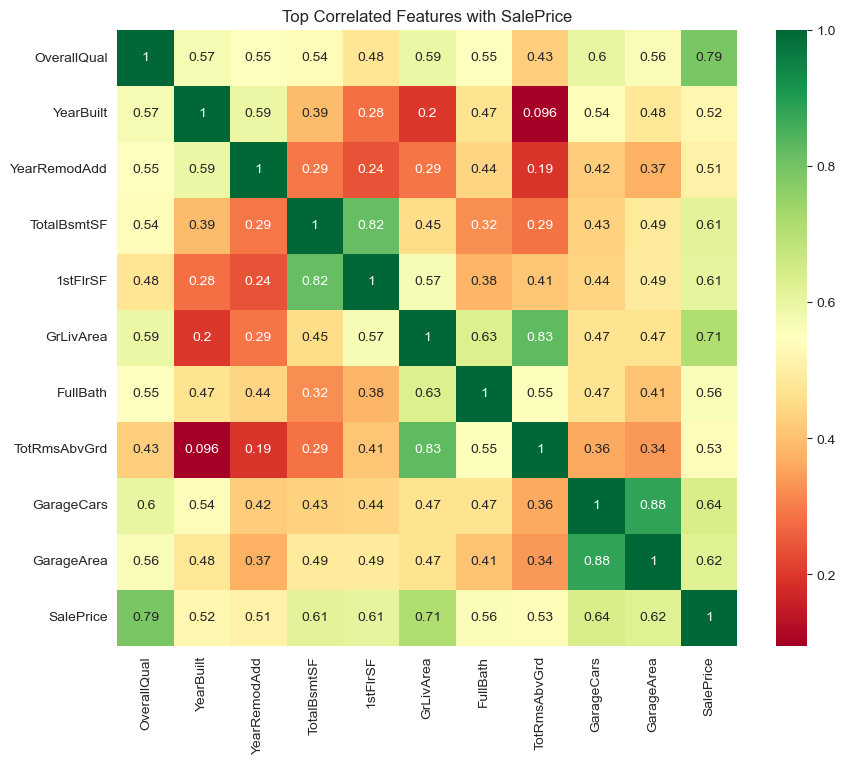

In [47]:
# Top 10 features most correlated with SalePrice
top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('Top Correlated Features with SalePrice')
plt.show()

In [48]:
# Check for missing values
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_data_percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percent'])
missing_df = missing_df[missing_df['Total'] > 0]
print("Features with missing values:")
print(missing_df)

Features with missing values:
              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685


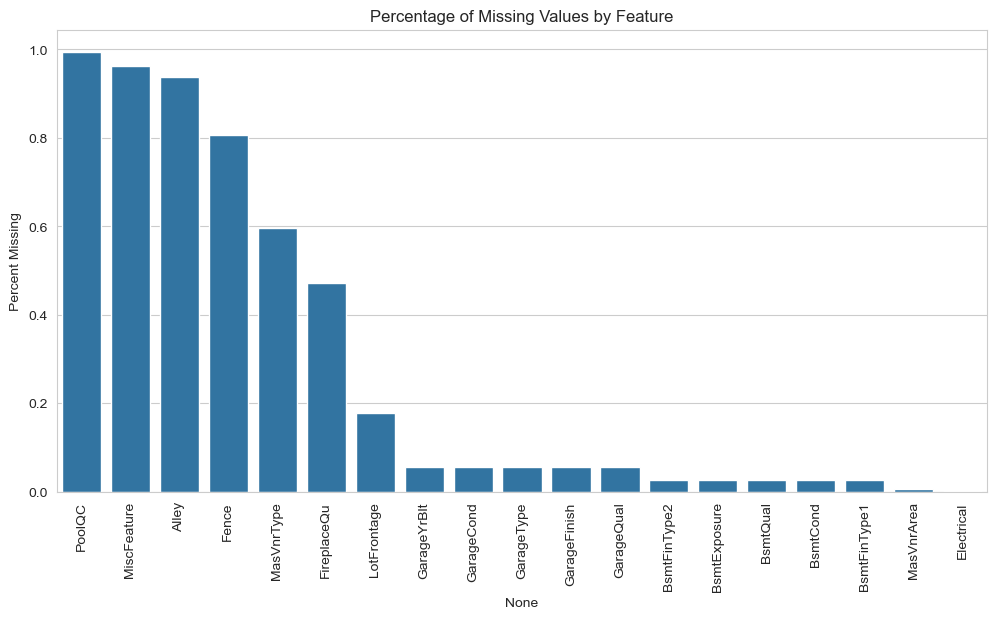

In [49]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percent'])
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percent Missing')
plt.show()

In [50]:
# Save the 'Id' column for submission
train_id = train['Id']
test_id = test['Id']

In [51]:
# Drop Id column as it's not needed for prediction
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [52]:
# Handle missing values based on data description
# Fill with 'None' for these categorical features
none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'MasVnrType']

for feature in none_features:
    train[feature].fillna('None', inplace=True)
    test[feature].fillna('None', inplace=True)

In [53]:
# Fill with 0 for these numerical features
zero_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
                'BsmtHalfBath', 'MasVnrArea']

for feature in zero_features:
    train[feature].fillna(0, inplace=True)
    test[feature].fillna(0, inplace=True)

In [54]:
# Fill with mode for these features
mode_features = ['Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 
                'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

for feature in mode_features:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)


In [55]:
# For LotFrontage, fill with median by neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [56]:
# Check if any missing values remain
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())

Remaining missing values in train: 0
Remaining missing values in test: 0


In [57]:
# Apply log transformation to the target variable to reduce skewness
train["SalePrice"] = np.log1p(train["SalePrice"])

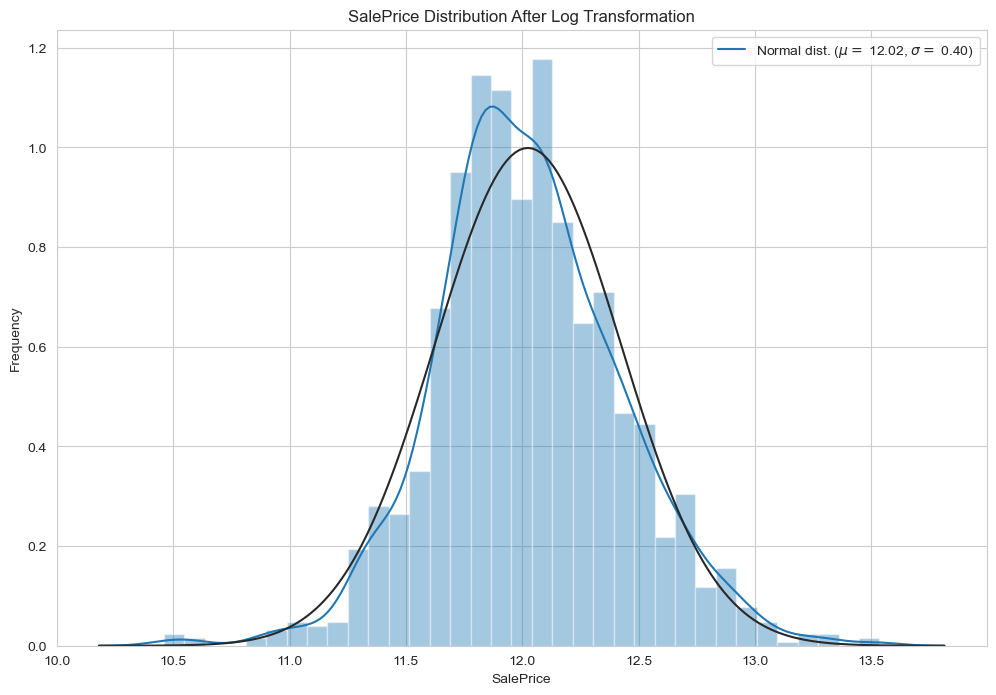

In [58]:
# Check the new distribution
sns.distplot(train['SalePrice'], fit=norm)
plt.title('SalePrice Distribution After Log Transformation')
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Check for skewed numerical features
numeric_features = train.dtypes[train.dtypes != 'object'].index
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness = skewness[abs(skewness) > 0.75]
print("Number of skewed features: ", skewness.shape[0])

Number of skewed features:  37


In [60]:
# Apply Box-Cox transformation to highly skewed features
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat != 'SalePrice':  # Don't transform the target again
        train[feat] = boxcox1p(train[feat], lam)
        test[feat] = boxcox1p(test[feat], lam)

In [61]:
# Create new features that might be useful
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

train['TotalBath'] = train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath'])
test['TotalBath'] = test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath'])

train['Age'] = train['YrSold'] - train['YearBuilt']
test['Age'] = test['YrSold'] - test['YearBuilt']

train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']

# Check if new features are correlated with SalePrice
new_features = ['TotalSF', 'TotalBath', 'Age', 'RemodAge']
print("Correlation of new features with SalePrice:")
print(train[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False))

Correlation of new features with SalePrice:
SalePrice    1.000000
TotalBath    0.624676
TotalSF      0.461224
RemodAge    -0.568104
Age         -0.585488
Name: SalePrice, dtype: float64


In [62]:
# Combine train and test for one-hot encoding
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

# One-hot encode categorical variables
all_data = pd.get_dummies(all_data)

# Split back into train and test
train_processed = all_data[:ntrain]
test_processed = all_data[ntrain:]

print("Processed training set shape:", train_processed.shape)
print("Processed test set shape:", test_processed.shape)

Processed training set shape: (1460, 306)
Processed test set shape: (1459, 306)


In [63]:
# Define features and target
X = train_processed
y = y_train

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_processed)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (1168, 306)
Validation set shape: (292, 306)


In [64]:
# Define evaluation function
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    return {
        'model': model_name,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'cv_rmse': cv_rmse,
        'model_obj': model
    }

In [65]:
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.001),
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42),
    MLPRegressor(hidden_layer_sizes=(100, 50), early_stopping=True, random_state=42)
]

model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost', 'Neural Network']

# Evaluate all models
results = []
for model, name in zip(models, model_names):
    result = evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val, name)
    results.append(result)
    print(f"{name}: Validation RMSE = {result['val_rmse']:.4f}, CV RMSE = {result['cv_rmse']:.4f}")

Linear Regression: Validation RMSE = 0.1414, CV RMSE = 0.1412
Ridge: Validation RMSE = 0.1230, CV RMSE = 0.1465
Lasso: Validation RMSE = 0.1224, CV RMSE = 0.1363
Random Forest: Validation RMSE = 0.1444, CV RMSE = 0.1465
XGBoost: Validation RMSE = 0.1430, CV RMSE = 0.1398
Neural Network: Validation RMSE = 0.9548, CV RMSE = 1.1640


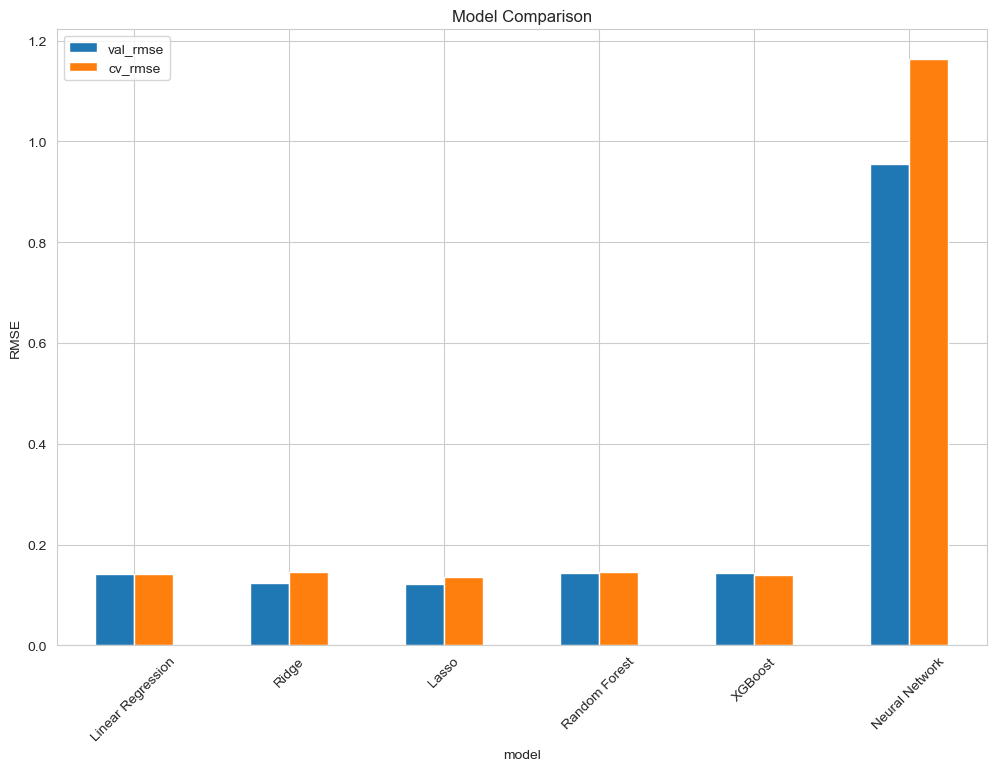

In [66]:
# Compare model performance
results_df = pd.DataFrame(results)
results_df = results_df[['model', 'train_rmse', 'val_rmse', 'cv_rmse']]
results_df.set_index('model', inplace=True)

# Plot results
results_df[['val_rmse', 'cv_rmse']].plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

In [67]:
# Tune the best performing model (let's assume XGBoost performed best)
xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                          cv=3, scoring='neg_mean_squared_error', 
                          n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate best model
best_xgb = grid_search.best_estimator_
xgb_result = evaluate_model(best_xgb, X_train_scaled, y_train, X_val_scaled, y_val, 'Tuned XGBoost')
print(f"Tuned XGBoost: Validation RMSE = {xgb_result['val_rmse']:.4f}, CV RMSE = {xgb_result['cv_rmse']:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1500, 'subsample': 0.8}
Tuned XGBoost: Validation RMSE = 0.1280, CV RMSE = 0.1246


In [68]:
# Train final model on all training data
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Make predictions on test set
test_pred = final_model.predict(test_scaled)

# Reverse the log transformation
test_pred = np.expm1(test_pred)

# Create submission file
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': test_pred
})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


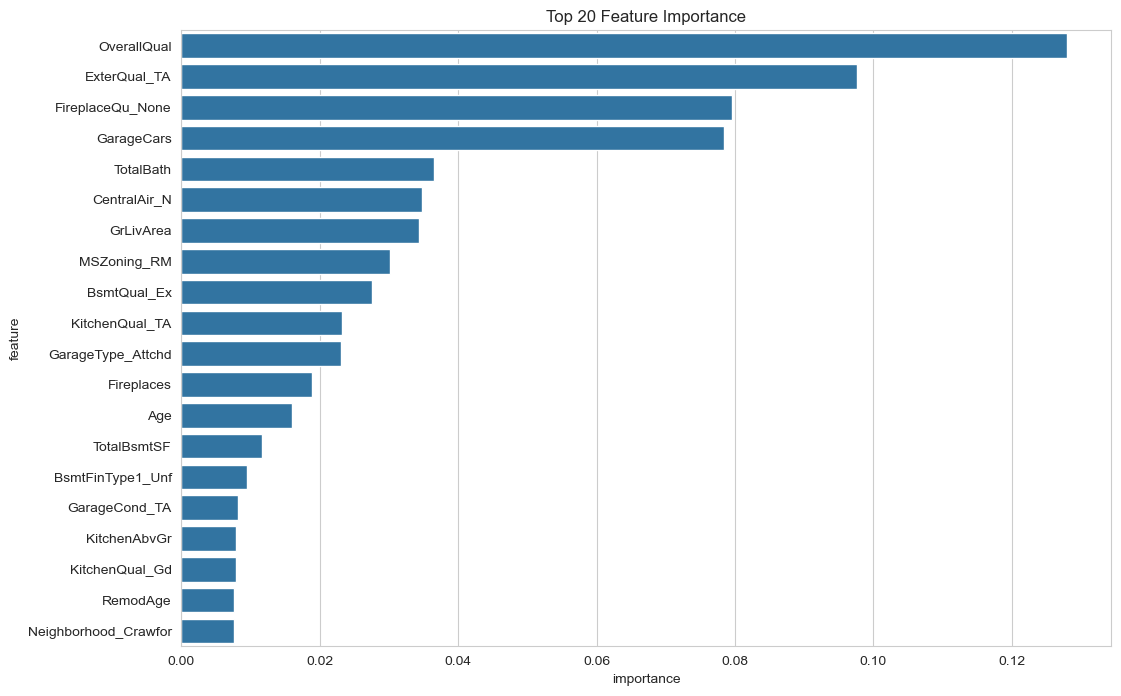

In [69]:
# Analyze feature importance for the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance')
plt.show()